In [2]:
from requests_oauthlib import OAuth1Session
import json
import datetime, time, sys
import tweepy
import csv

#Twitter API„ÅÆconsumer_key,consumer_secret,access_token,access_secret„ÇíÂÖ•Âäõ
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

twitter = OAuth1Session(consumer_key, consumer_secret, access_token, access_secret)

url = 'https://api.twitter.com/1.1/search/tweets.json'
res = twitter.get(url, params = {'q':u'python', 'count':100})
res_text = json.loads(res.text)
for tweet in res_text['statuses']:
    print('-----')
    print(tweet['created_at'])
    print(tweet)

-----
Fri Apr 16 07:29:03 +0000 2021
{'created_at': 'Fri Apr 16 07:29:03 +0000 2021', 'id': 1382959204756029442, 'id_str': '1382959204756029442', 'text': 'Secure and random passphrase: afreets bleed cracking greenshank | Strength: 0.964602/1.0 | #passphrase #passwords‚Ä¶ https://t.co/wwGesOHHcx', 'truncated': True, 'entities': {'hashtags': [{'text': 'passphrase', 'indices': [91, 102]}, {'text': 'passwords', 'indices': [103, 113]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/wwGesOHHcx', 'expanded_url': 'https://twitter.com/i/web/status/1382959204756029442', 'display_url': 'twitter.com/i/web/status/1‚Ä¶', 'indices': [115, 138]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/password_gen" rel="nofollow">SecurePassphraseBot</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 33

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

#„ÉÑ„Ç§„Éº„ÉàÂèñÂæó
tweet_data = []

tweets = tweepy.Cursor(api.user_timeline,screen_name = "@nikkei_bizdaily",exclude_replies = True)
for tweet in tweets.items():
    tweet_data.append([tweet.id,tweet.created_at,tweet.text.replace('\n',''),tweet.favorite_count,tweet.retweet_count])
tweet_data

[[1382825232340197381,
  datetime.datetime(2021, 4, 15, 22, 36, 41),
  '„Äê16Êó•„ÅÆÁ¥ôÈù¢„ÄëÈªíÂ≠ó„Åß„ÇÇÂæåÁ∂ôËÄÖ„Å´ÊÇ©„ÇÄ‰∏≠Â∞è‰ºÅÊ•≠„ÅØÂ§ö„ÅÑ„Å®Ë®Ä„Çè„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Åù„Çì„Å™‰∫ãÊ•≠ÊâøÁ∂ô„Å´Êñ∞„Åó„ÅÑÂΩ¢„ÅåÂá∫„Å¶„Åç„Å¶„ÅÑ„Çã„Çà„ÅÜ„Åß„Åô„ÄÇÁ∑®ÈõÜÂßîÂì°„Åå„Åæ„Å®„ÇÅ„Åæ„Åó„Åü https://t.co/QaJbvoKZmU',
  11,
  8],
 [1382487216425893889,
  datetime.datetime(2021, 4, 15, 0, 13, 32),
  '„ÄêÔºëÔºïÊó•„ÅÆÁ¥ôÈù¢„ÄëÊó•ÁµåÁî£Ê•≠Êñ∞ËÅû„ÅßÈï∑ÊúüÂ±ïÈñã„Åó„Å¶„ÅÑ„Çã„ÇΩ„Éã„Éº„ÅÆÈÄ£Ëºâ‰ºÅÁîª„Åß„Åô„ÄÇ‰ªäÂõû„ÅØ„Ç≤„Éº„É†„Å´ÁÑ¶ÁÇπ„Çí„ÅÇ„Å¶„Å¶„ÅÑ„Åæ„Åô https://t.co/smIV8GlmKq',
  23,
  13],
 [1382103117798330371,
  datetime.datetime(2021, 4, 13, 22, 47, 16),
  '„Äê14Êó•„ÅÆÁ¥ôÈù¢„ÄëÊñ∞Âûã„Ç≥„É≠„Éä„ÅØ„ÅÇ„Çâ„ÇÜ„ÇãÁî£Ê•≠„ÅÆÂΩ¢ÊÖã„ÇíÂ§â„Åà„Åæ„Åó„Åü„ÄÇ„Çπ„Çø„Éº„Éà„Ç¢„ÉÉ„Éó„Å´„ÇÇ„ÇÇ„Å°„Çç„ÇìÂΩ±Èüø„ÅåÂá∫„Å¶„ÅÑ„Åæ„Åô„ÄÇ„Ç≥„É≠„ÉäÊµÅË°å„Åã„Çâ‰∏ÄÂπ¥„ÄÅ„Å©„ÅÜÂ§â„Çè„Å£„Å¶„ÅÑ„Çã„Åã„Åæ„Å®„ÇÅ„Åæ„Åó„Åü https://t.co/53Xr6nYDP1',
  22,
  6],
 [1381737743328235520,
  datetime.datetime(2021, 4, 12, 22, 35, 24),
  '„Äê13Êó•„ÅÆÁ¥ôÈ

In [4]:
with open('./tweets.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["id", "text", "created_at", "fav", "RT"])
    writer.writerows(tweet_data)

In [5]:
import MeCab
import re
# MeCab„Ç§„É≥„Çπ„Çø„É≥„Çπ„ÅÆ‰ΩúÊàê
m = MeCab.Tagger('')

# „ÉÜ„Ç≠„Çπ„Éà„ÇíÂΩ¢ÊÖãÁ¥†Ëß£Êûê„ÅóËæûÊõ∏„ÅÆ„É™„Çπ„Éà„ÇíËøî„ÅôÈñ¢Êï∞
def get_diclist(text):
    parsed = m.parse(text)      # ÂΩ¢ÊÖãÁ¥†Ëß£ÊûêÁµêÊûú
    lines = parsed.split('\n')  # Ëß£ÊûêÁµêÊûú„Çí1Ë°åÔºà1Ë™ûÔºâ„Åî„Å®„Å´ÂàÜ„Åë„Å¶„É™„Çπ„ÉàÂåñ
    lines = lines[0:-2]         # Âæå„Çç2Ë°å„ÇíÂâäÈô§
    diclist = []
    for word in lines:
        l = re.split('\t|,',word) 
        d = {'Surface':l[0], 'POS1':l[1], 'POS2':l[2]}
        diclist.append(d)
    return(diclist)

In [7]:
#„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆ„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
import urllib.request
import zipfile
# URL„ÇíÊåáÂÆö
url = "https://storage.googleapis.com/tutor-contents-dataset/6050_stock_price_prediction_data.zip"
save_name = url.split('/')[-1]
# „ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
mem = urllib.request.urlopen(url).read()
# „Éï„Ç°„Ç§„É´„Å∏‰øùÂ≠ò
with open(save_name, mode='wb') as f:
    f.write(mem)
# zip„Éï„Ç°„Ç§„É´„Çí„Ç´„É¨„É≥„Éà„Éá„Ç£„É¨„ÇØ„Éà„É™„Å´Â±ïÈñã
zfile = zipfile.ZipFile(save_name)
zfile.extractall('.')

In [8]:
import pandas as pd
pn_df = pd.read_csv('./6050_stock_price_prediction_data/pn_ja.csv', encoding='utf-8', names=('Word','Reading','POS', 'PN'))
#word_list„Å´„É™„Çπ„ÉàÂûã„ÅßWord„ÇíÊ†ºÁ¥ç
word_list = list(pn_df['Word'])
#pn_list„Å´„É™„Çπ„ÉàÂûã„ÅßPN„ÇíÊ†ºÁ¥ç
pn_list   = list(pn_df['PN'])
#pn_dict„Å®„Åó„Å¶word_list, pn_list„ÇíÊ†ºÁ¥ç„Åó„ÅüËæûÊõ∏„Çí‰ΩúÊàê
pn_dict   = dict(zip(word_list, pn_list))
print(list(pn_dict.keys())[:10])
print(len(pn_dict.keys()))

['ÂÑ™„Çå„Çã', 'ËâØ„ÅÑ', 'Âñú„Å∂', 'Ë§í„ÇÅ„Çã', '„ÇÅ„Åß„Åü„ÅÑ', 'Ë≥¢„ÅÑ', 'ÂñÑ„ÅÑ', 'ÈÅ©„Åô', 'Â§©Êô¥', 'Á•ù„ÅÜ']
52671


In [9]:
import numpy as np
# ÂΩ¢ÊÖãÁ¥†Ëß£ÊûêÁµêÊûú„ÅÆÂçòË™û„Åî„Å®„ÅÆdict„Éá„Éº„Çø„Å´PNÂÄ§„ÇíËøΩÂä†„Åô„ÇãÈñ¢Êï∞
def add_pnvalue(diclist_old, pn_dict):
    diclist_new = []
    for word in diclist_old:
        base = word['Surface']        # ÂÄã„ÄÖ„ÅÆËæûÊõ∏„Åã„ÇâÂü∫Êú¨ÂΩ¢„ÇíÂèñÂæó
        if base in pn_dict:
            pn = float(pn_dict[base]) 
        else:
            pn = 'notfound'         
        word['PN'] = pn
        diclist_new.append(word)
    return(diclist_new)
# ÂêÑ„ÉÑ„Ç§„Éº„Éà„ÅÆPNÂπ≥ÂùáÂÄ§„ÇíÊ±Ç„ÇÅ„Çã
def get_mean(dictlist):
    pn_list = []
    for word in dictlist:
        pn = word['PN']
        if pn!='notfound':
            pn_list.append(pn)
    if len(pn_list)>0:
        pnmean = np.mean(pn_list)
    else:
        pnmean=0
    return pnmean

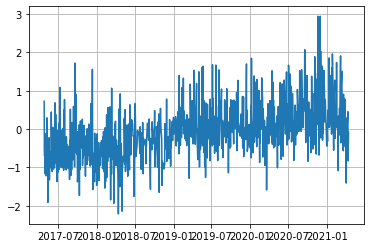

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df_tweets = pd.read_csv('./tweets.csv', names=['id', 'date', 'text', 'fav', 'RT'], index_col='date')
df_tweets = df_tweets.drop('text', axis=0)
df_tweets.index = pd.to_datetime(df_tweets.index)
df_tweets = df_tweets[['text']].sort_index(ascending=True)

# „ÉÑ„Ç§„Éº„Éà„Åî„Å®„ÅÆÂπ≥ÂùáÂÄ§„ÇíÊ±Ç„ÇÅ„Çã
means_list = []
for tweet in df_tweets['text']:
    dl_old = get_diclist(tweet)
    dl_new = add_pnvalue(dl_old, pn_dict)
    pnmean = get_mean(dl_new)
    means_list.append(pnmean)

# means_list„ÇínumpyÈÖçÂàó„Å´Â§âÊèõ
means_list = np.copy(means_list)

# means_list„ÇíÁî®„ÅÑ„Å¶Ê®ôÊ∫ñÂåñ
x_std = (means_list - means_list.mean()) / means_list.std()

df_tweets['pn'] = x_std
df_tweets = df_tweets.drop('text', axis=1)
df_tweets.index = pd.to_datetime(df_tweets.index)
# 1Êó•„Åî„Å®„Å´pnÂÄ§„ÇíÂπ≥Âùá„Åß„Åæ„Å®„ÇÅ„Å¶„ÄÅÊ¨†ÊêçÂÄ§„ÅØÁ∑öÂΩ¢Ë£úÈñì„ÇíË°å„ÅÜ
df_tweets =  df_tweets.resample('D').mean().interpolate()

# Êó•‰ªò„ÇíxËª∏PNÂÄ§„ÇíyËª∏„Å´„Åó„Å¶„Éó„É≠„ÉÉ„Éà
x = df_tweets.index
y = df_tweets.pn
plt.plot(x,y)
plt.grid(True)

# df_tweets.csv„Å®„ÅÑ„ÅÜÂêçÂâç„Åßdf_tweets„ÇíÂÜç„Å≥Âá∫Âäõ
df_tweets.to_csv('./df_tweets.csv')